Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

### Import necessary libraries

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix

### Import the data

In [2]:
data = pd.read_csv("D:\\Downloads\\Prajnya\\Assignments\\14.Decision Trees\\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Data Preprocessing

In [3]:
data = data.rename({'Undergrad':'undergrad','Marital.Status':'marital','Taxable.Income':'taxincome','City.Population':'population','Work.Experience':'experience','Urban':'urban'},axis=1)
data.head()

,undergrad,marital,taxincome,population,experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
data["taxinc"] = pd.cut(data["taxincome"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
data.head()

,undergrad,marital,taxincome,population,experience,urban,taxinc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [5]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban','taxinc'] dropping first dummy variable
data=pd.get_dummies(data,columns=['undergrad','marital','urban','taxinc'], drop_first=True)
data.head(10)

,taxincome,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


In [6]:
data.tail(10)

,taxincome,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxinc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


### EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   taxincome        600 non-null    int64
 1   population       600 non-null    int64
 2   experience       600 non-null    int64
 3   undergrad_YES    600 non-null    uint8
 4   marital_Married  600 non-null    uint8
 5   marital_Single   600 non-null    uint8
 6   urban_YES        600 non-null    uint8
 7   taxinc_Good      600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 17.1 KB


In [8]:
data.isna().sum()

taxincome          0
population         0
experience         0
undergrad_YES      0
marital_Married    0
marital_Single     0
urban_YES          0
taxinc_Good        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,taxincome,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxinc_Good
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333,0.793333
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406,0.405252
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


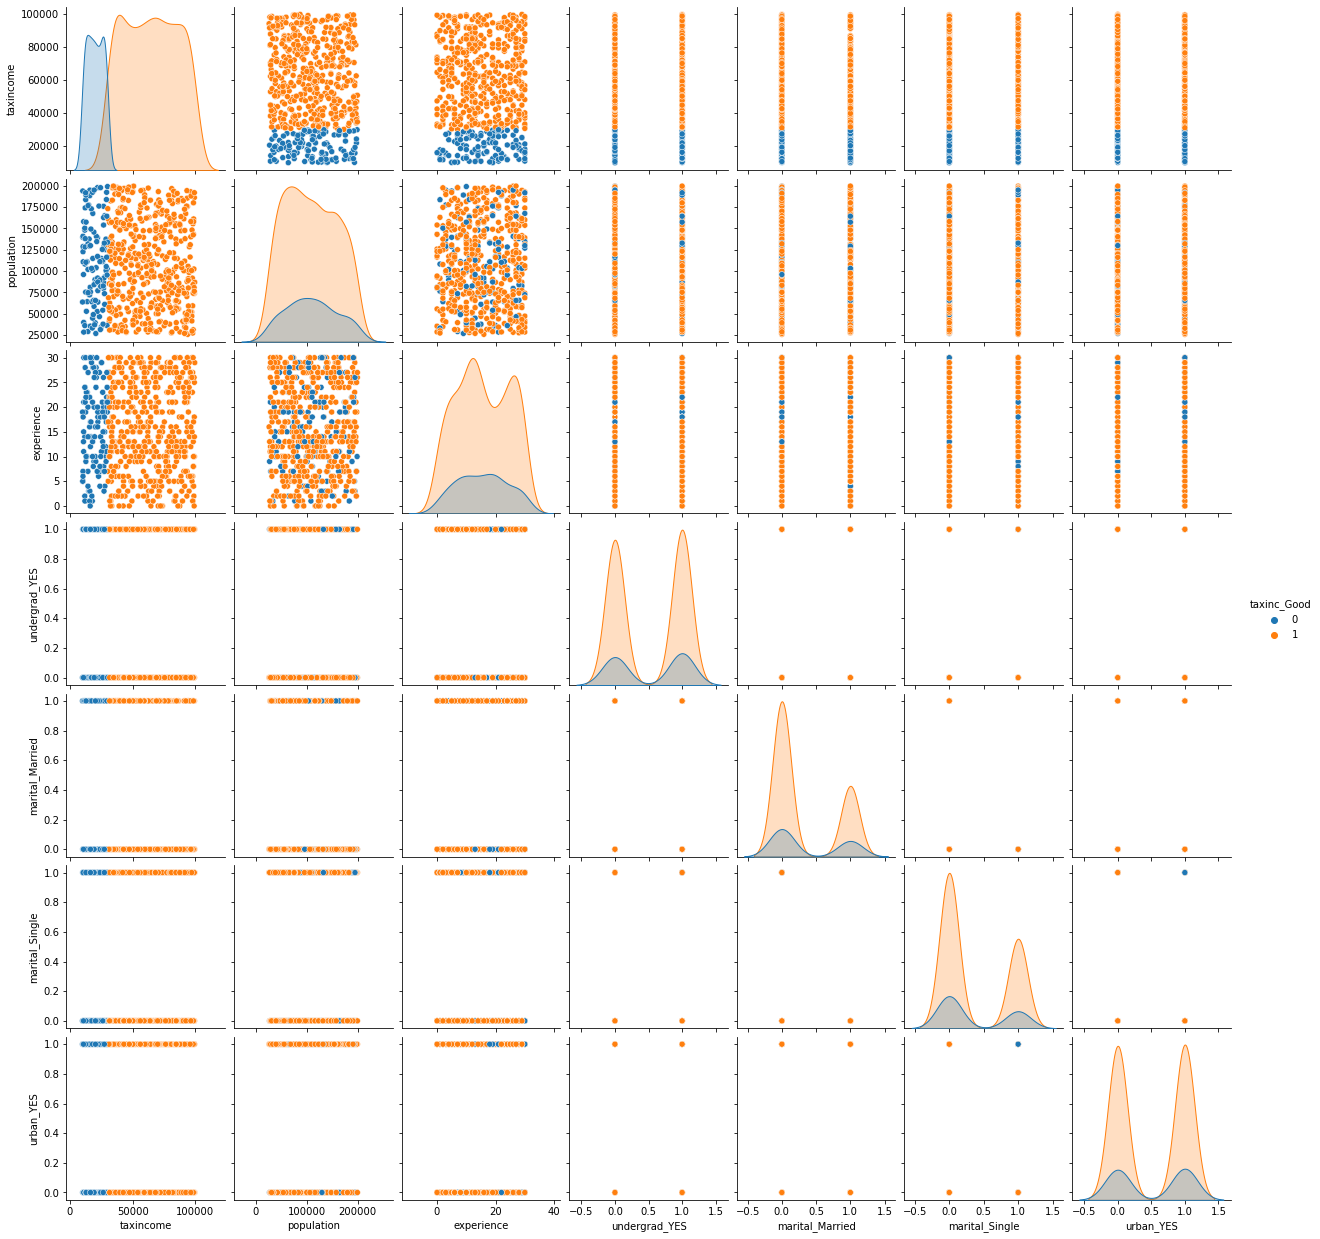

In [11]:
# pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=data, hue = 'taxinc_Good')

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
data1 = norm_func(data.iloc[:,1:])
data1.head(10)

,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxinc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


In [14]:
# Declaring features & target
x = data1.drop(['taxinc_Good'], axis=1)
y = data1['taxinc_Good']

In [15]:
x

,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [16]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: taxinc_Good, Length: 600, dtype: float64

In [17]:
data['taxinc_Good'].unique()

array([1, 0], dtype=uint8)

In [18]:
data.taxinc_Good.value_counts()

1    476
0    124
Name: taxinc_Good, dtype: int64

In [19]:
colnames = list(data.columns)
colnames

['taxincome',
 'population',
 'experience',
 'undergrad_YES',
 'marital_Married',
 'marital_Single',
 'urban_YES',
 'taxinc_Good']

In [20]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 6) (120, 6) (480,) (120,)


### Building Decision Tree Classifier using entropy criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

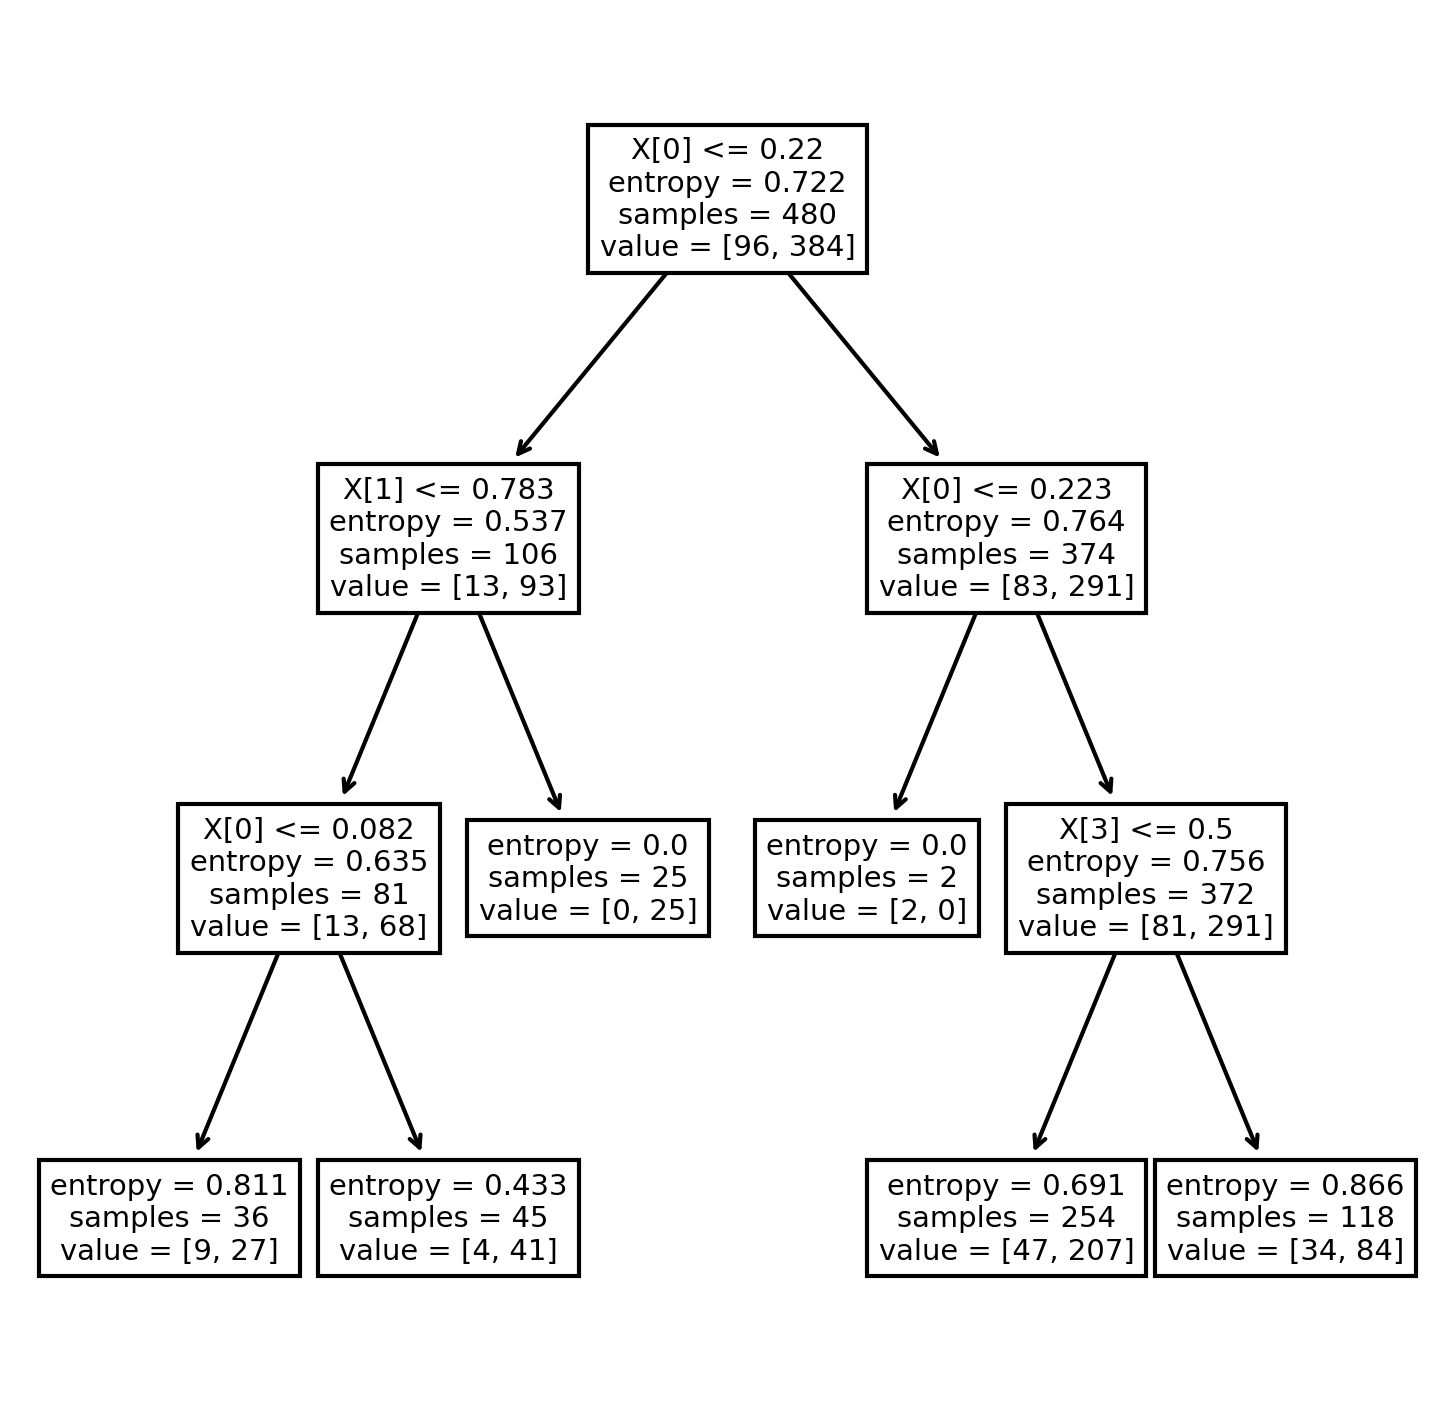

In [23]:
#PLot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model);

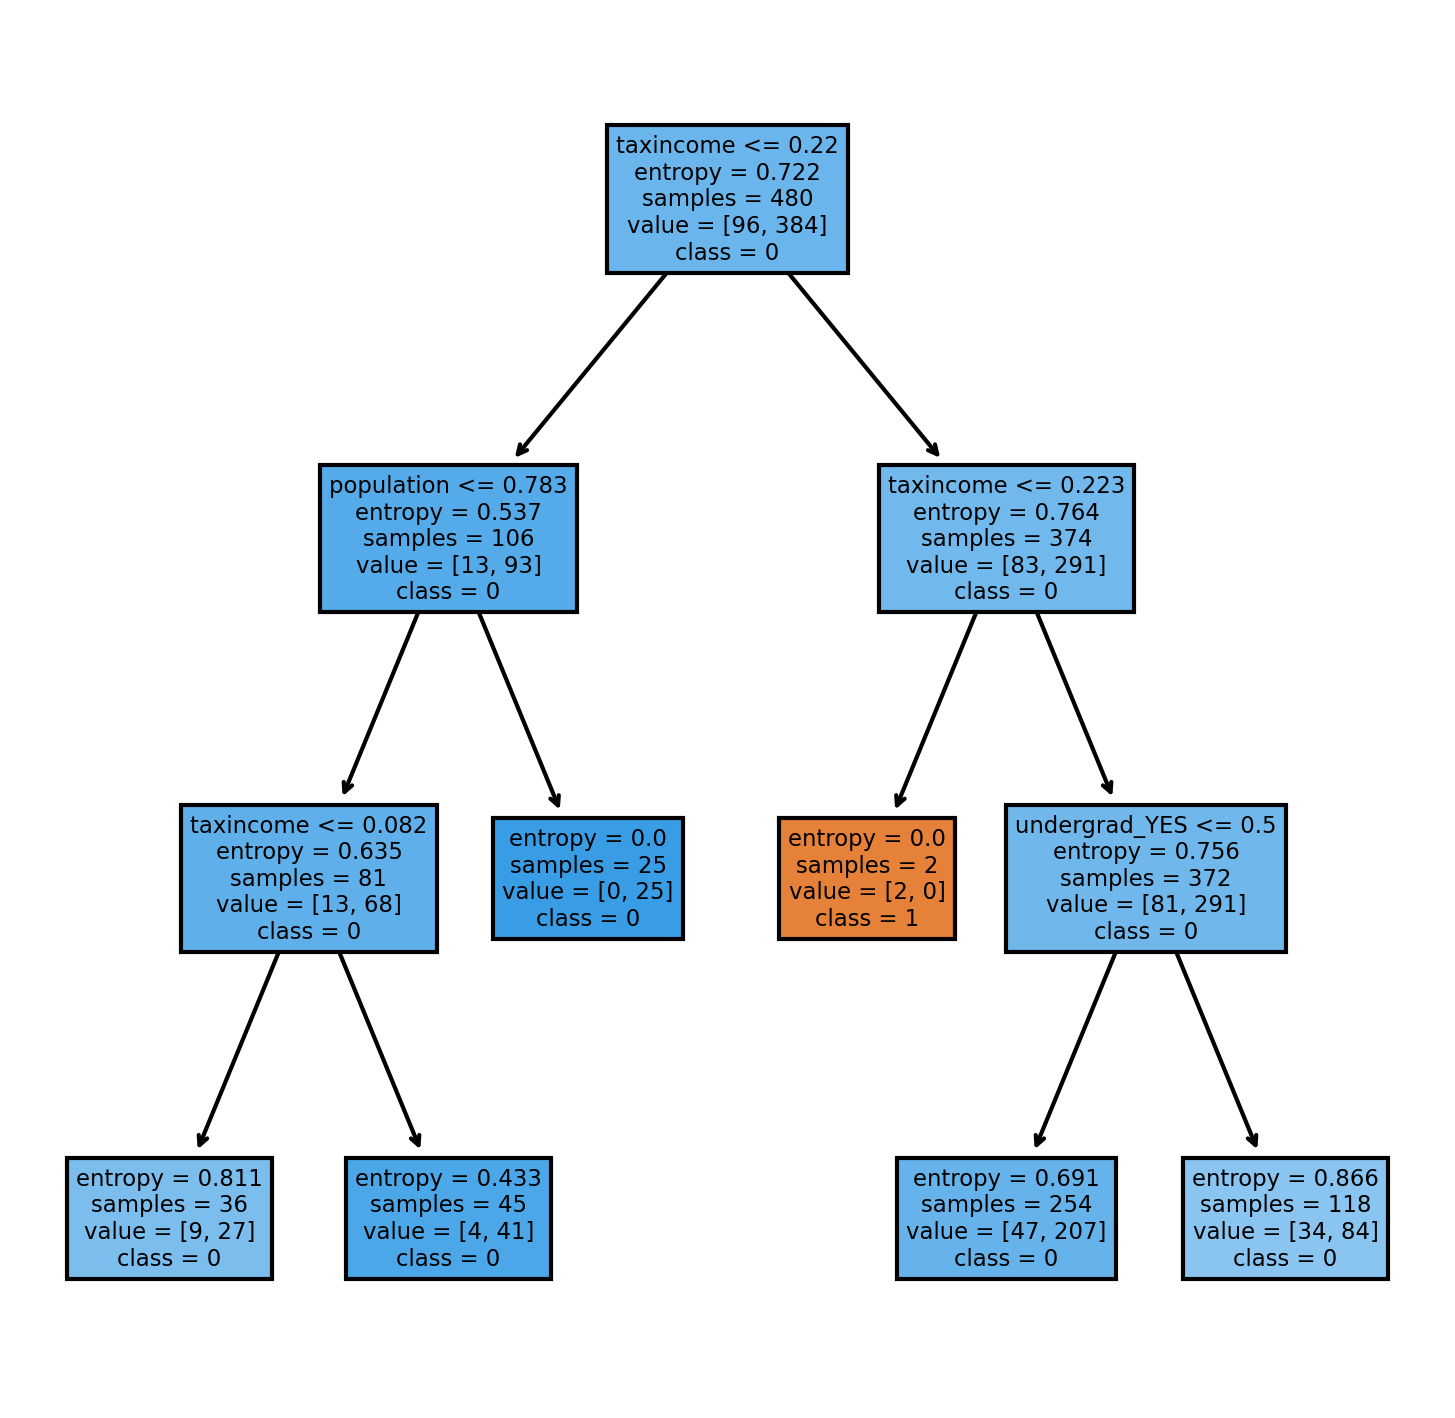

In [24]:
fn=['taxincome','population','experience','undergrad_YES','marital_Married','marital_Single','urban_YES']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [25]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1.0    120
dtype: int64

In [26]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [27]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1.0
taxinc_Good,
0.0,28
1.0,92


In [28]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

### Building Decision Tree Classifier using Gini Criteria

In [29]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [32]:
np.mean(preds==y_test)

0.7583333333333333

### Running the decision tree on whole data

In [33]:
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_gini.fit(x, y)
#Prediction and computing the accuracy
preds=model_gini.predict(x)
np.mean(preds==y)

0.7966666666666666

### Decision Tree Regression Example

In [34]:
data

,taxincome,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [35]:
array = data.values
array

array([[ 68833,  50047,     10, ...,      1,      1,      1],
       [ 33700, 134075,     18, ...,      0,      1,      1],
       [ 36925, 160205,     30, ...,      0,      1,      1],
       ...,
       [ 47334, 154058,      0, ...,      0,      1,      1],
       [ 98592, 180083,     17, ...,      0,      0,      1],
       [ 96519, 158137,     16, ...,      0,      0,      1]], dtype=int64)

In [36]:
x = array[:,0:6]
y = array[:,6]

In [37]:
x

array([[ 68833,  50047,     10,      0,      0,      1],
       [ 33700, 134075,     18,      1,      0,      0],
       [ 36925, 160205,     30,      0,      1,      0],
       ...,
       [ 47334, 154058,      0,      0,      0,      0],
       [ 98592, 180083,     17,      1,      1,      0],
       [ 96519, 158137,     16,      0,      0,      0]], dtype=int64)

In [38]:
y

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 6)
(180, 6)
(420,)
(180,)


In [43]:
#model = DecisionTreeRegressor(criterion='squared_error')
model = DecisionTreeRegressor(criterion='poisson')
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson')

In [44]:
model.score(x_train, y_train)

0.635695490427366

In [45]:
#Find the accuracy
model.score(x_test,y_test)

-0.648299277548321